In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/problems'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/problems


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Real_Combine.csv')

In [4]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


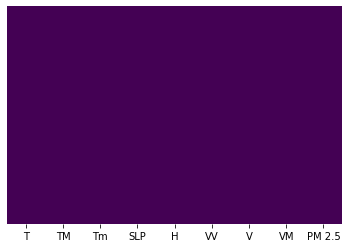

In [5]:
## Check for null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#Percentage of null values
data.isnull().mean()

T         0.000000
TM        0.000000
Tm        0.000000
SLP       0.000000
H         0.000000
VV        0.000000
V         0.000000
VM        0.000000
PM 2.5    0.001368
dtype: float64

In [7]:
#Dropping the null values as only a small percentage of it is present
data=data.dropna()

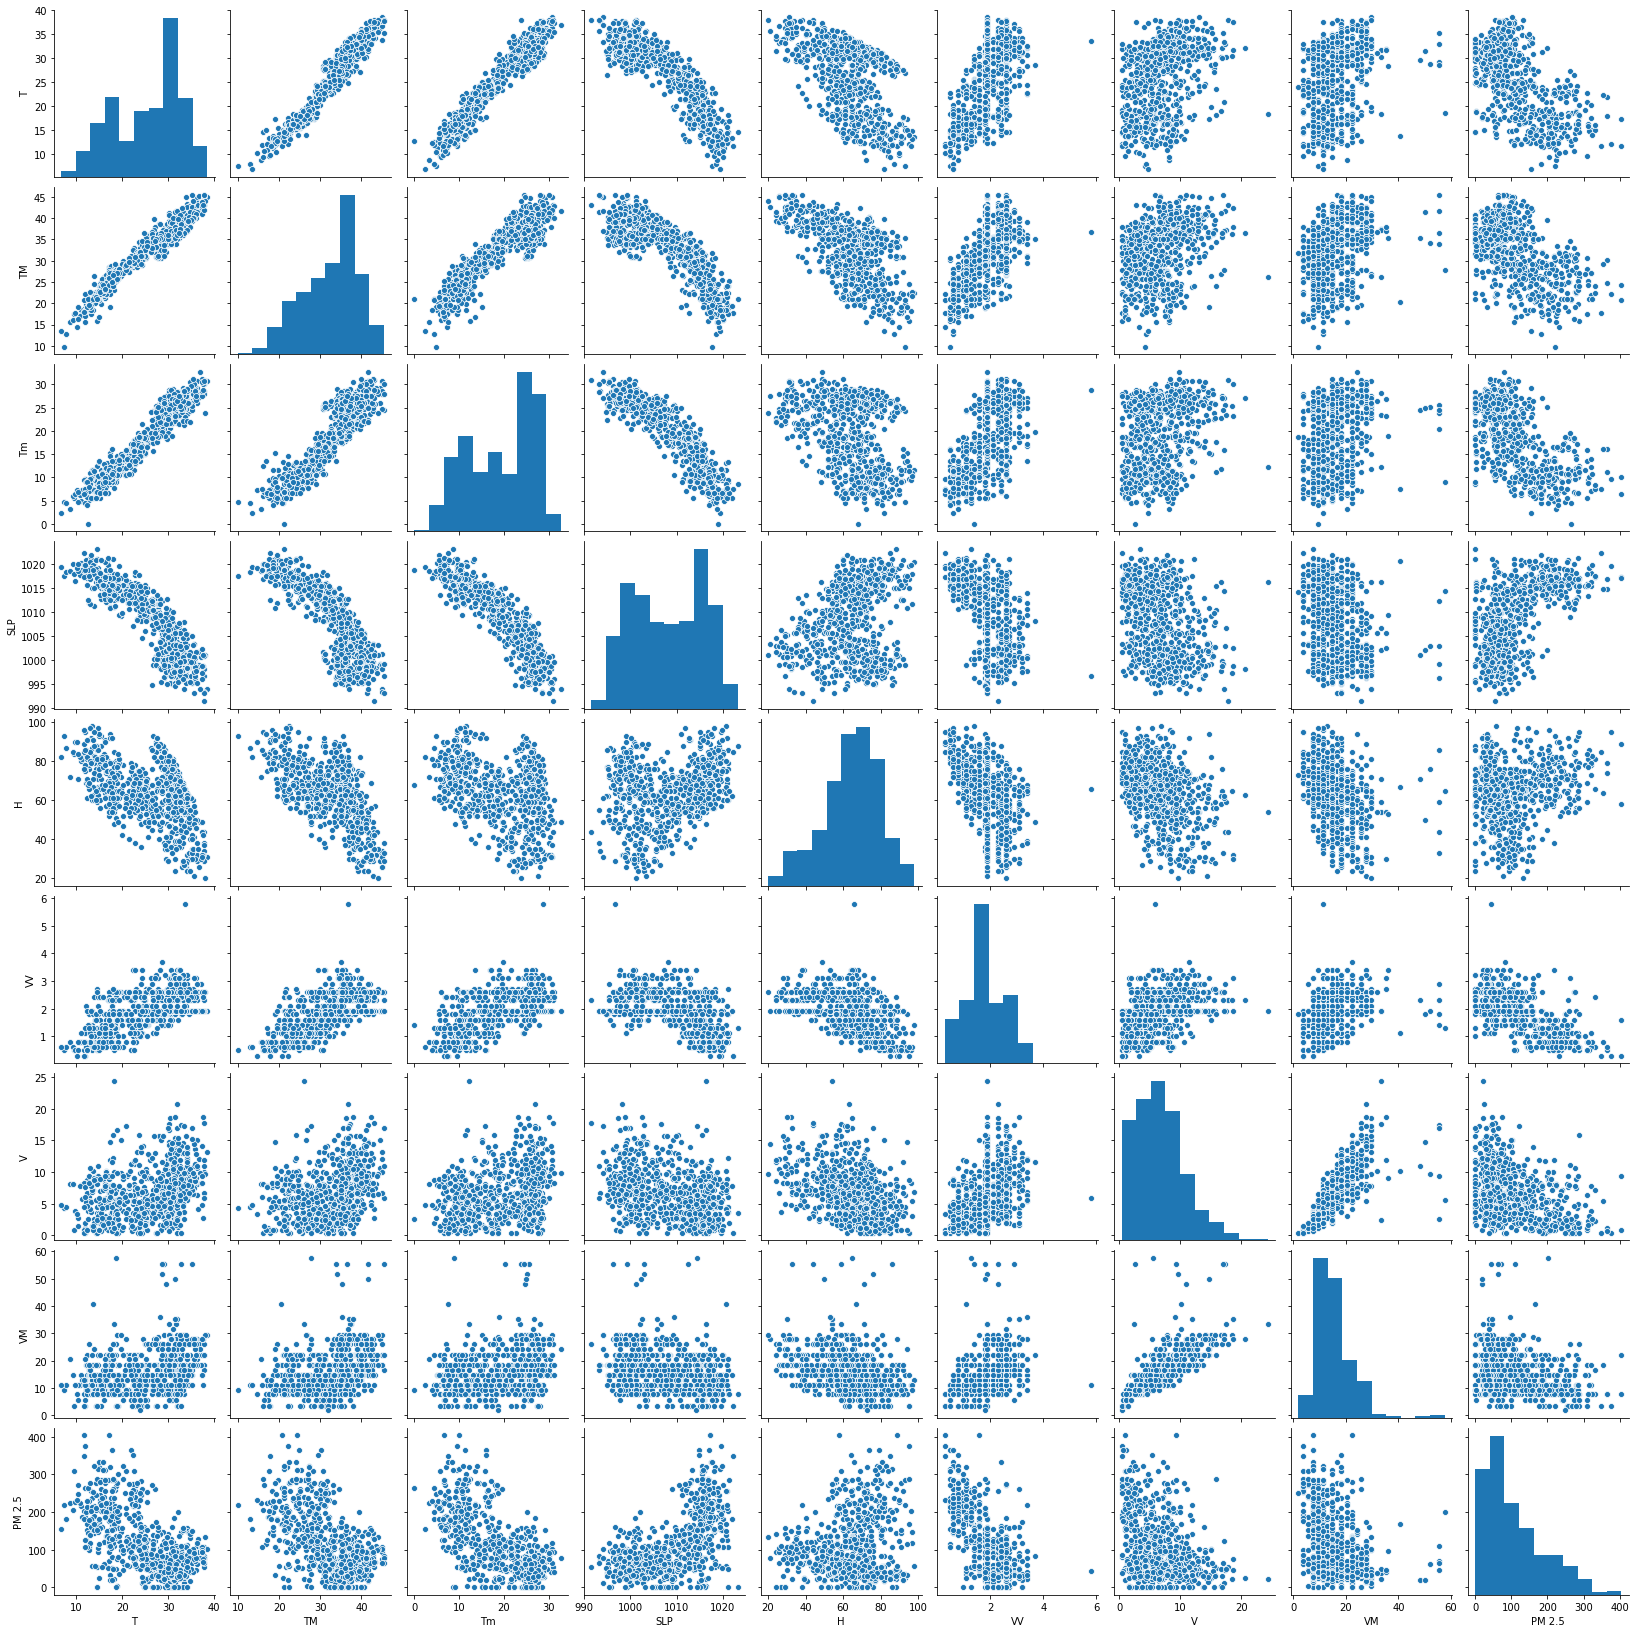

In [8]:
sns.pairplot(data)

In [9]:
#Checking the corelation
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


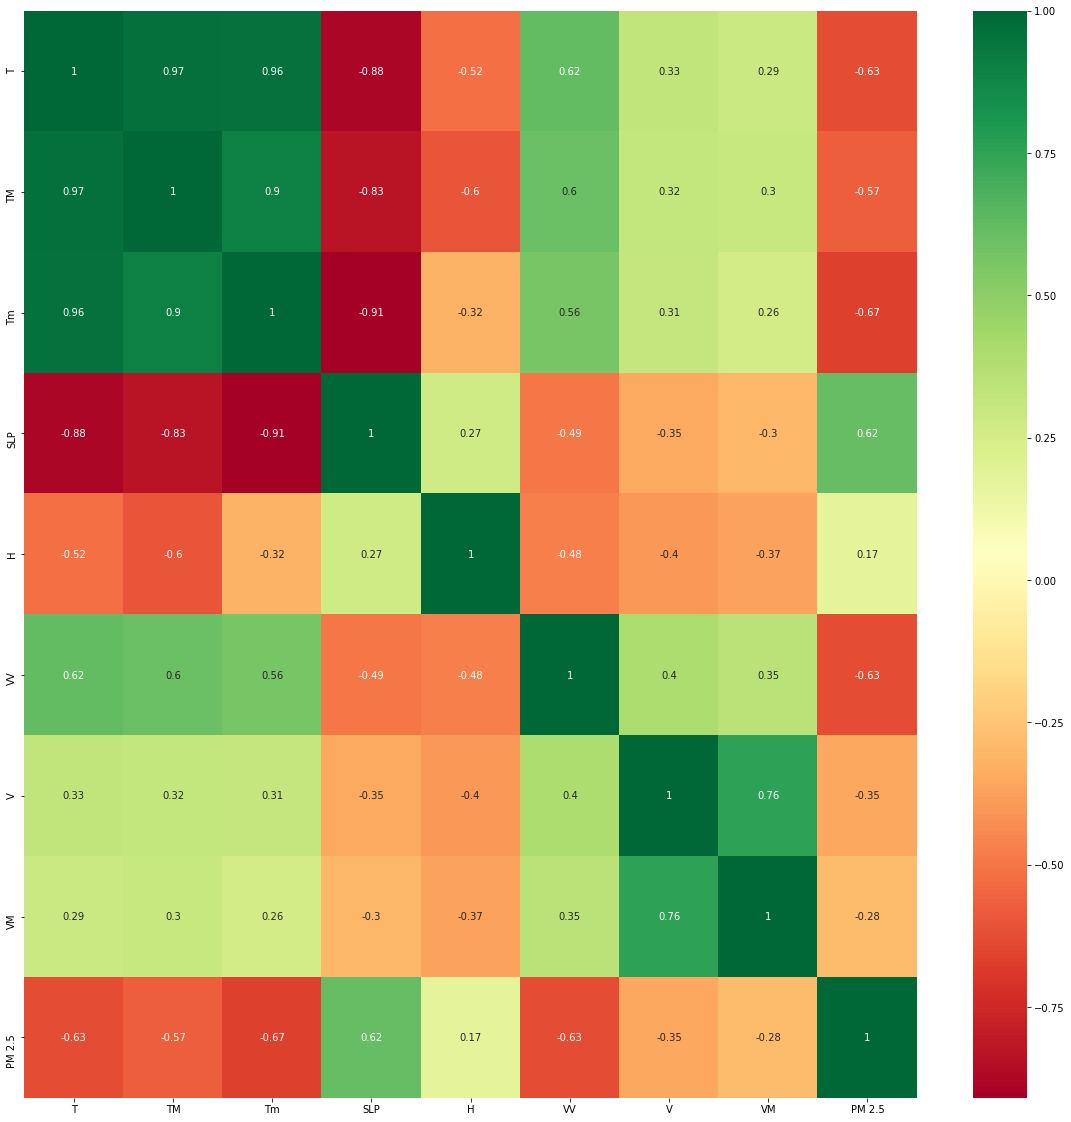

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corr = data.corr()

plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [11]:
X = data.drop('PM 2.5',axis=1)
y = data['PM 2.5']

In [12]:
#Checking feature importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

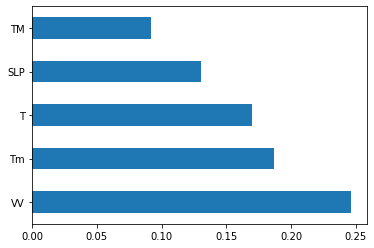

In [13]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

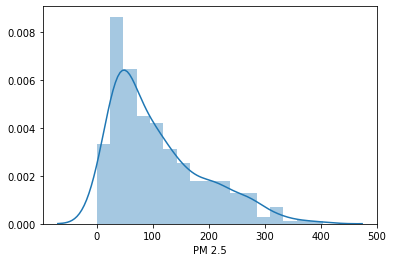

In [14]:
sns.distplot(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion="mse")
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
prediction = rf.predict(X_test)

In [18]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9500372607036054
0.6477902066056459


## Regression Evaluation Metrics

In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.03830669710807
MSE: 2299.279714786752
RMSE: 47.950805152643184


## Hyperparameter Optimization using Bayesian Optimization(Hyperopt)

In [20]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [21]:
space = {'criterion': hp.choice('criterion', ['mse']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [22]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x7f103e0f5550>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f103e0f5710>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7f103e0f5828>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f103e0f5a58>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7f103e0f5ba8>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7f103e0f5cf8>}

In [23]:

def objective(space):
    model = RandomForestRegressor(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    mse = cross_val_score(model, X_train, y_train, cv = 5).mean()

    
    return {'loss': -mse, 'status': STATUS_OK} 

In [24]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [06:33<00:00,  4.92s/it, best loss: -0.6122999552649782]


{'criterion': 0,
 'max_depth': 590.0,
 'max_features': 2,
 'min_samples_leaf': 0.0010443840339541591,
 'min_samples_split': 0.05346931951014401,
 'n_estimators': 3}

In [25]:
best['criterion']

0

In [26]:
rf = RandomForestRegressor(criterion='mse',max_depth=590,n_estimators=750,min_samples_split=0.0534,min_samples_leaf=0.0010)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
prediction = rf.predict(X_test)

0.7815737772978685
0.6213869747315324


## Regression Evaluation Metrics

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 35.343804141024826
MSE: 2471.644074300707
RMSE: 49.7156320919357
